In [1]:
# To do list:
# - Find Days in drive repository folder
# - Load files of a day:
#   * Infrared Images
#   * Pyranometer Measures
#   * Weather Data

import os, pickle

import numpy as np
import matplotlib.pylab as plt

from cv2 import imread, IMREAD_UNCHANGED
from scipy import interpolate
from datetime import datetime

# Load-up Dataset

In [4]:
# Load csv file
def _load_csv_file(path):
    return np.loadtxt(open(path, "rb"), delimiter = ",")
# Load infrared frame
def _load_infrared(file): 
    return imread(file, IMREAD_UNCHANGED)
# Path to the original files recorded by device
path_ws = r'C:\Users\Guille\Desktop\troposphere_radiometry_model\data\weather_station'
path_py = r'C:\Users\Guille\Desktop\troposphere_radiometry_model\data\pyranometer'
path_ir = r'C:\Users\Guille\Desktop\troposphere_radiometry_model\data\ir_camera'
# List Inititialization
N_ = []
W_ = []
P_ = []
I_ = []
U_ = []
# loop over directory of infrared day folders
for file in os.listdir(path_ir):
    file_ws = '{}\{}.csv'.format(path_ws, file)
    file_py = '{}\{}.csv'.format(path_py, file)
    file_ir = '{}\{}'.format(path_ir, file)
    # Display current processing day
    print(file)
    print(file_ws)
    print(file_py)
    print(file_ir)
    # Day-list Initialization
    i_ = []
    u_ = []
    # Loop over images in infrared folder
    for image_name in os.listdir(file_ir):
        # Define path to an infrared image
        path_image = '{}\{}'.format(file_ir, image_name)
        # Load and append image to day-list
        i_.append(_load_infrared(path_image)[..., np.newaxis])
        u_.append(np.array((int(image_name[:-6])))[..., np.newaxis])
    # load and append data to the lists
    N_.append(file)
    W_.append(_load_csv_file(file_ws))
    P_.append(_load_csv_file(file_py))
    I_.append(i_)
    U_.append(u_)

2017_12_08
C:\Users\Guille\Desktop\radiometry\data\weather_station\2017_12_08.csv
C:\Users\Guille\Desktop\radiometry\data\pyranometer\2017_12_08.csv
C:\Users\Guille\Desktop\radiometry\data\ir_camera\2017_12_08
2017_12_09
C:\Users\Guille\Desktop\radiometry\data\weather_station\2017_12_09.csv
C:\Users\Guille\Desktop\radiometry\data\pyranometer\2017_12_09.csv
C:\Users\Guille\Desktop\radiometry\data\ir_camera\2017_12_09
2017_12_12
C:\Users\Guille\Desktop\radiometry\data\weather_station\2017_12_12.csv
C:\Users\Guille\Desktop\radiometry\data\pyranometer\2017_12_12.csv
C:\Users\Guille\Desktop\radiometry\data\ir_camera\2017_12_12
2017_12_13
C:\Users\Guille\Desktop\radiometry\data\weather_station\2017_12_13.csv
C:\Users\Guille\Desktop\radiometry\data\pyranometer\2017_12_13.csv
C:\Users\Guille\Desktop\radiometry\data\ir_camera\2017_12_13
2017_12_15
C:\Users\Guille\Desktop\radiometry\data\weather_station\2017_12_15.csv
C:\Users\Guille\Desktop\radiometry\data\pyranometer\2017_12_15.csv
C:\Users\Gu

KeyboardInterrupt: 

# Wather Station, Pyranometer, and Infrared Images Features

In [2]:
# To do list:
# - Unix time to minutes accomulated in a day

# Save it back to the csv file
def _save_csv_file(X_p_, path):
    return np.savetxt(path, X_p_, delimiter = ",")

# Interpolar Variables in the .csv file to match girasol machine measurements
def _interpolate(u_, p_, w_):
    x_ = p_[:, 0]
    _f_1 = interpolate.interp1d(x_, p_[:, 1])
    _f_2 = interpolate.interp1d(x_, w_[:, 1])
    _f_3 = interpolate.interp1d(x_, w_[:, 2])
    _f_4 = interpolate.interp1d(x_, w_[:, 3])
    _f_5 = interpolate.interp1d(x_, w_[:, 4])
    _f_6 = interpolate.interp1d(x_, w_[:, 5])
    _f_7 = interpolate.interp1d(x_, w_[:, 6])
    return _f_1(u_), _f_2(u_), _f_3(u_), _f_4(u_), _f_5(u_), _f_6(u_), _f_7(u_)

# Transform unix time to readeble human time
def _unix_2_readable(u_):
    r_ = np.ones(u_.shape)
    y_ = np.ones(u_.shape)
    for i in range(u_.shape[0]):
        _t = datetime.fromtimestamp(u_[i]).timetuple()
        r_[i] = _t.tm_hour*60.*60. + _t.tm_min*60. + _t.tm_sec
    return r_, y_*_t.tm_yday
    
idx = 1
# loop over days
for day in range(len(U_)):
    # Unpack day Weather Station data
    w_ = W_[day]
    p_ = P_[day]
    i_ = I_[day]
    u_ = U_[day]
    # Set data in a desired matrix format
    i_ = np.concatenate(i_, axis = 2)
    u_ = np.concatenate(u_, axis = 0)
    i_ = i_.reshape(i_.shape[0]*i_.shape[1], i_.shape[2]).T
    i_ = i_[idx:-idx, :]
    u_ = u_[idx:-idx]
    # Transform unix time to readeble human time
    r_, y_ = _unix_2_readable(u_)
    print(w_.shape, p_.shape, u_.shape, i_.shape, r_.shape, y_.shape)
    # Calculate Infrared Images Statistics
    i_mean_ = np.mean(i_, axis = 1)
    i_std_  = np.std(i_, axis = 1)
    i_min_  = np.min(i_, axis = 1)
    i_max_  = np.max(i_, axis = 1)
    print(i_mean_.shape, i_std_.shape, i_min_.shape, i_max_.shape)
    # Interpolate Weather Station measurements
    p_1_, w_1_, w_2_, w_3_, w_4_, w_5_, w_6_ = _interpolate(u_, p_, w_)
    print(p_1_.shape, w_1_.shape, w_2_.shape, w_3_.shape, w_4_.shape, w_5_.shape, w_6_.shape)
    # Display data-processing
    plt.figure(figsize = (20, 5))
    plt.subplot(141)
    plt.plot(u_, i_mean_)
    plt.plot(u_, i_min_)
    plt.subplot(142)
    plt.plot(u_, p_1_)
    plt.subplot(143)
    plt.plot(u_, w_1_)
    plt.subplot(144)
    plt.plot(u_, w_2_)
    plt.show()
    
    # Concatenate in a single matrix new interpolated Weather station measurements
    X_p_ = np.concatenate((u_[:, np.newaxis], i_mean_[:, np.newaxis], i_min_[:, np.newaxis], 
                           r_[:, np.newaxis], y_[:, np.newaxis], p_1_[:, np.newaxis],
                           w_1_[:, np.newaxis], w_2_[:, np.newaxis], w_3_[:, np.newaxis], w_6_[:, np.newaxis]), axis = 1)
    
    # Save new file
    name = r''
    path = r'C:\Users\Guille\Desktop\troposphere_radiometry_model\samples\{}.csv'.format(name)
    print(path)
    _save_csv_file(X_p_, path)
    print(X_p_.shape)

NameError: name 'U_' is not defined

# Cloud Height from Pixels Temperatures

(150884, 7) (150884, 2)
(60, 80, 2168) (2168,)
(2168,) (2168,) (2168,) (2168,) (2168,) (2168,) (2168,)


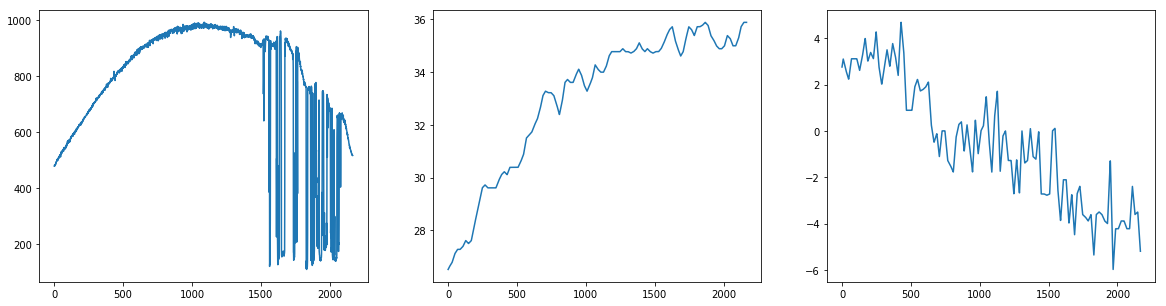

In [7]:
# To do list:
# - Save a Sample Day so it can be easy load-up

def _interpolate(u_, p_, w_):
    x_   = p_[:, 0]
    _f_1 = interpolate.interp1d(x_, p_[:, 1])
    _f_2 = interpolate.interp1d(x_, w_[:, 1])
    _f_3 = interpolate.interp1d(x_, w_[:, 2])
    _f_4 = interpolate.interp1d(x_, w_[:, 3])
    _f_5 = interpolate.interp1d(x_, w_[:, 4])
    _f_6 = interpolate.interp1d(x_, w_[:, 5])
    _f_7 = interpolate.interp1d(x_, w_[:, 6])
    return _f_1(u_), _f_2(u_), _f_3(u_), _f_4(u_), _f_5(u_), _f_6(u_), _f_7(u_)

# Save Variable in a pickle file
def _save_pickle(X_, path):
    with open(path, 'wb') as file:
        pickle.dump(X_, file)
        
idx = 400
day = 34
    
w_ = W_[day]
p_ = P_[day]
i_ = I_[day]
u_ = U_[day]
print(w_.shape, p_.shape)
i_ = np.concatenate(i_, axis = 2)
u_ = np.concatenate(u_, axis = 0)
i_ = i_[:, :, idx:-idx]
u_ = u_[idx:-idx]
print(i_.shape, u_.shape)

p_1_, w_1_, w_2_, w_3_, w_4_, w_5_, w_6_ = _interpolate(u_, p_, w_)
print(p_1_.shape, w_1_.shape, w_2_.shape, w_3_.shape, w_4_.shape, w_5_.shape, w_6_.shape)

plt.figure(figsize = (20, 5))
plt.subplot(131)
plt.plot(p_1_)
plt.subplot(132)
plt.plot(w_1_)
plt.subplot(133)
plt.plot(w_2_)
plt.show()

# Save Sample Here...
path = r'C:\Users\Guille\Desktop\troposphere_radiometry_model\image\{}.pkl'.format(day)
X_ = [u_, i_, p_1_, w_1_, w_2_, w_3_, w_4_, w_5_, w_6_]
_save_pickle(X_, path)

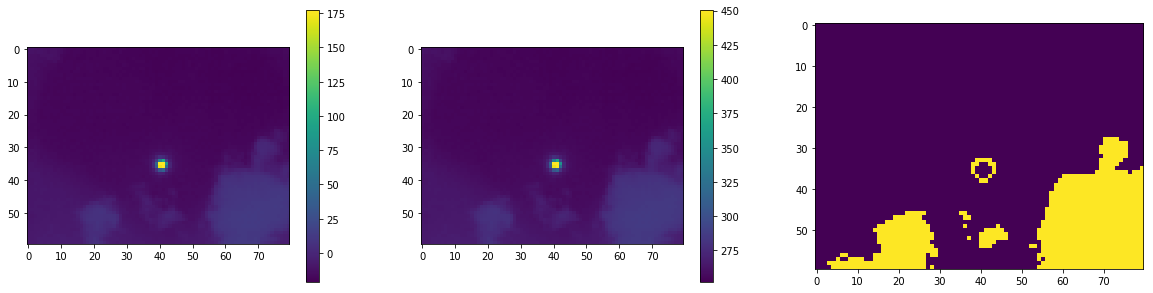

1600 308.67687000726215 270.36496005809727 3055.988061002183


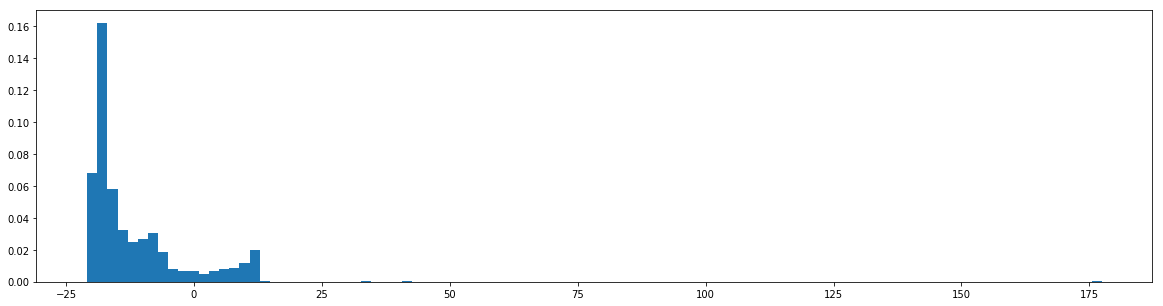

267.16 290.67 252.29


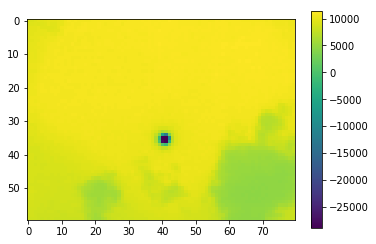

3659.9329283053125 1829.9664641526563
11460.745936435398 5730.372968217699


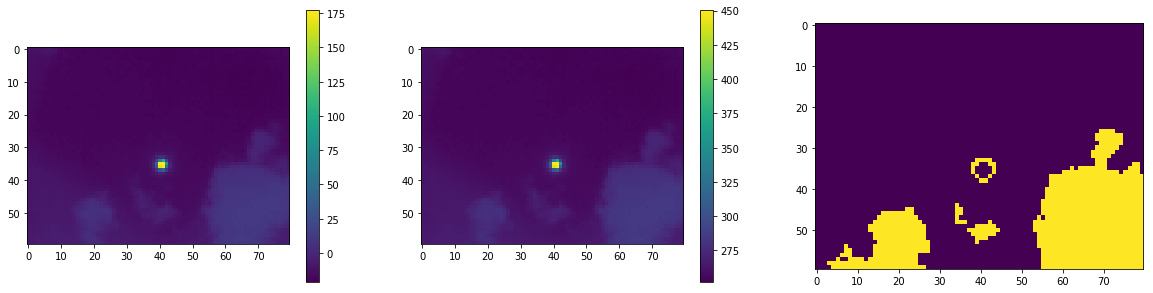

1601 308.6877632534495 270.4521060275962 3046.6913289760323


KeyboardInterrupt: 

In [2]:
# To do list:
# - Load a variable saved in a pickle file

def _load_pickle(path):
    with open(path, 'rb') as file:
        X_ = pickle.load(file)
    return X_

def _cloud_base(t_air, t_dew, elevation = 1615):
    height = 304.8*(t_air - t_dew)/2.5
    return height - elevation

def _cloud_height(t_cloud, t_air):
    return (t_cloud - t_air)/-.00984

def _kelvin_2_celcius(val):
    return (val - 27315.) / 100.0

def _cloud_height_average(t_cloud, t_air, alpha = .00984):
    return 2*(t_air - t_cloud) / alpha

# def _cloud_height_average(t_cloud, t_air, alpha = .00984, height_troposphere = 8000., elevation = 1615):
    
#     height_cloud_ = np.zeros(t_cloud.shape)
    
#     A = t_air**2 - 2*alpha*height_troposphere*t_cloud
#     idx_neg_ = A < 0.
#     idx_pos_ = A > 0.
#     B = np.sqrt(np.absolute((A))) 

#     height_cloud_neg_ = (- t_air + B)/( - alpha )
#     height_cloud_pos_ = (- t_air - B)/( - alpha )
    
#     height_cloud_[idx_neg_] = height_cloud_neg_[idx_neg_]
#     height_cloud_[idx_pos_] = height_cloud_pos_[idx_pos_]
#     return height_cloud_


# def _cloud_height_average(t_cloud, t_air, alpha = .00984, height_troposphere = 8000., elevation = 1615):
#     return (t_cloud - t_air)/-.00984

day = 34
path = r'C:\Users\Guille\Desktop\troposphere_radiometry_model\image\{}.pkl'.format(day)
u_, i_, p_1_, w_1_, w_2_, w_3_, w_4_, w_5_, w_6_ = _load_pickle(path)

for i in range(1600, 2000):
    
    t_cloud_cel_ = _kelvin_2_celcius(i_[..., i])
    t_cloud_kel_ = i_[..., i]/100.
    idx_1 = t_cloud_cel_ > - 6
    idx_2 = t_cloud_cel_ < 30
    idx_ = idx_1 & idx_2

    t_air = w_1_[i] + 273.15
    t_dew = w_2_[i] + 273.15
    h_base = _cloud_base(t_air, t_dew)
    #h_cloud_ = _cloud_height(t_cloud, t_air)
    
    plt.figure(figsize = (20, 5))
    plt.subplot(131)
    plt.imshow(t_cloud_cel_)
    plt.colorbar()
    plt.subplot(132)
    plt.imshow(t_cloud_kel_)
    plt.colorbar()
    plt.subplot(133)
    plt.imshow(idx_)
    plt.show()
    print(i, t_air, t_dew, h_base)

    # the histogram of the data
    plt.figure(figsize = (20, 5))
    n, bins, patches = plt.hist(t_cloud_cel_.flatten(), 100, density=True)
    plt.show()
    
    data_ = t_cloud_kel_[idx_]
    print(data_.min(), data_.max(), t_cloud_kel_.min())
    
    h_cloud_average_ = _cloud_height_average(t_cloud_kel_, t_air)

    plt.figure()
    plt.imshow(h_cloud_average_)
    plt.colorbar()
    plt.show()

    print(_cloud_height_average(data_.max(), t_air), _cloud_height(data_.max(), t_air))
    print(_cloud_height_average(t_cloud_kel_.min(), t_air), _cloud_height(t_cloud_kel_.min(), t_air))

#     t_cloud_mean = np.mean(t_cloud_[idx_])
#     height_mean = _cloud_height(t_cloud_mean, t_air)
#     print(t_cloud_mean, height_mean)
    
#     plt.figure(figsize = (20, 5))
#     plt.subplot(131)
#     plt.imshow(t_cloud_)
#     plt.colorbar()
#     plt.subplot(132)
#     plt.imshow(h_cloud_average_)
#     plt.colorbar()
#     plt.subplot(133)
#     plt.imshow(idx_)
#     plt.show()

210.13


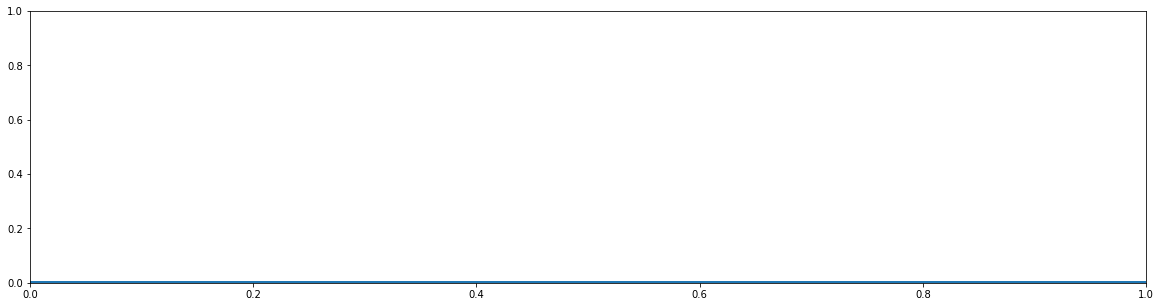

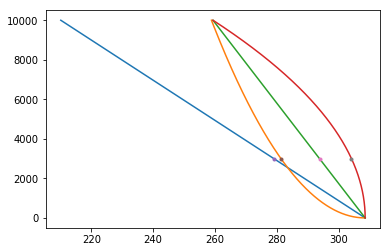

279.01 281.31344730240903 293.77 304.102
259.3299999999999 275.41167348588834 283.93 292.1217917917918


In [3]:
def _f(t_air, height):
    return t_air - alpha*height


def _g(t_air, height):
    alpha = - 3.18
    alpha = - 4.05
    a = 1.
    b = - 2. * t_air
    c = t_air**2 + height/alpha
    return (- b - np.sqrt(b**2 - 4*a*c))/(2.*a)

def _w(t_air, height):
    return t_air - .5*alpha*height

def _k(t_air, height):
    #return t_air + (- t_air * height + .5*alpha*height**2)/h_top
    return + t_air - .5*alpha*height**2/h_top


t_air = 308.53
t_cloud = 279.5
h_top = 10000.
alpha = 0.00984

x_ = np.linspace(0, h_top, 1000)
x = 3000.   
print(_f(t_air, x_[-1]))

plt.figure()
plt.plot(_f(t_air, x_), x_)
plt.plot(_g(t_air, x_), x_)
plt.plot(_w(t_air, x_), x_)
plt.plot(_k(t_air, x_), x_)

plt.plot(_f(t_air, x), x, '.')
plt.plot(_g(t_air, x), x, '.')
plt.plot(_w(t_air, x), x, '.')
plt.plot(_k(t_air, x), x, '.')

plt.show()
print(_f(t_air, x), _g(t_air, x), _w(t_air, x), _k(t_air, x))

print(np.mean(_f(t_air, x_)), np.mean(_g(t_air, x_)), np.mean(_w(t_air, x_)),np.mean(_k(t_air, x_)))